In [19]:
# Titanic EDA Notebook

# 1. Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# 2. Loading the dataset
df = pd.read_csv('train.csv')

In [21]:
# 3. Extracting the basic info
print("=== Dataset Info ===")
print(df.info())
print("\n=== Descriptive Statistics ===")
print(df.describe())
print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== Descriptive Statistics ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   2

In [22]:
# 4. Survival Counts (Exact numbers)
print("\n=== Survival Counts ===")
survival_counts = df['Survived'].value_counts()
print(f"Not Survived (0): {survival_counts[0]}")
print(f"Survived (1): {survival_counts[1]}")

# Finding the Percentage
print("\n=== Survival Percentage ===")
print(df['Survived'].value_counts(normalize=True) * 100)


=== Survival Counts ===
Not Survived (0): 549
Survived (1): 342

=== Survival Percentage ===
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [23]:
# 5. Value Counts of other important features
print("\n=== Pclass Counts ===")
print(df['Pclass'].value_counts())

print("\n=== Sex Counts ===")
print(df['Sex'].value_counts())

print("\n=== Embarked Counts ===")
print(df['Embarked'].value_counts())


=== Pclass Counts ===
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

=== Sex Counts ===
Sex
male      577
female    314
Name: count, dtype: int64

=== Embarked Counts ===
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


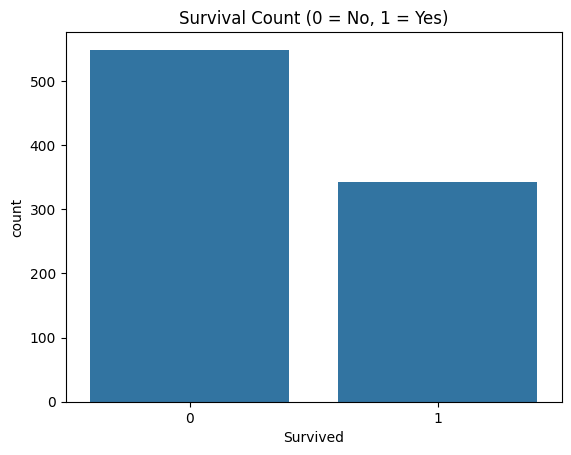

In [24]:
# 6. Visual Explorations

# a. Survival Count Bar Plot
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

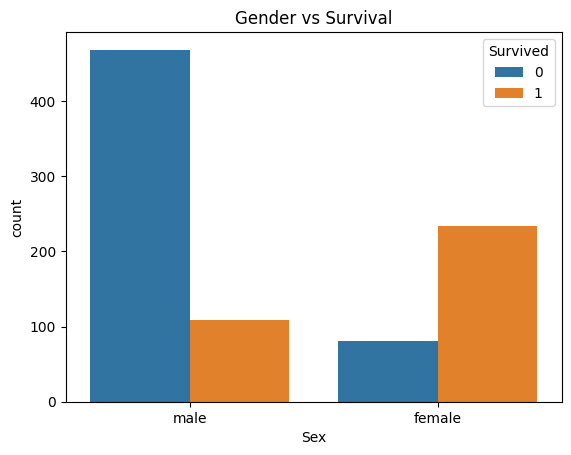

In [25]:
# b. Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Gender vs Survival')
plt.show()

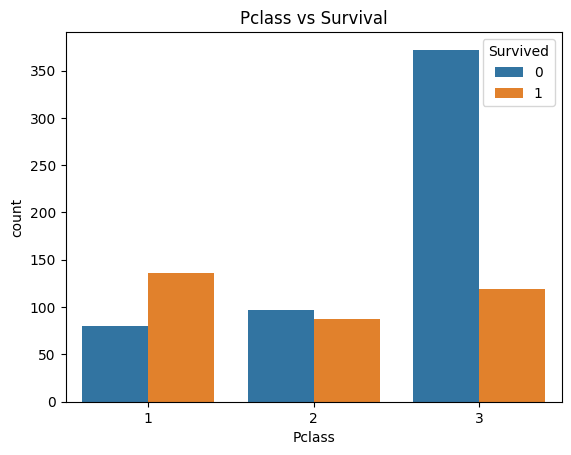

In [26]:
# c. Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survival')
plt.show()

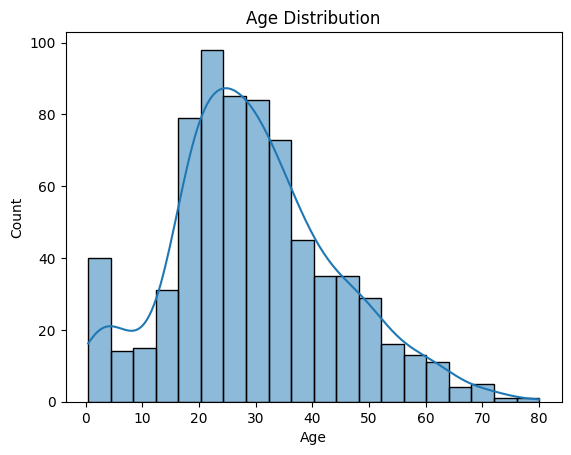

In [27]:
# d. Age Distribution
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

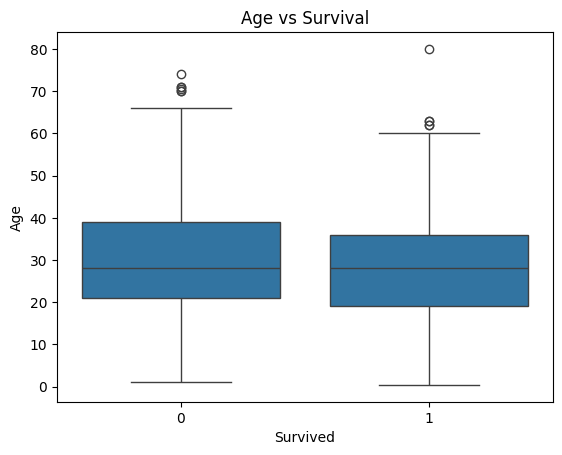

In [28]:
# e. Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

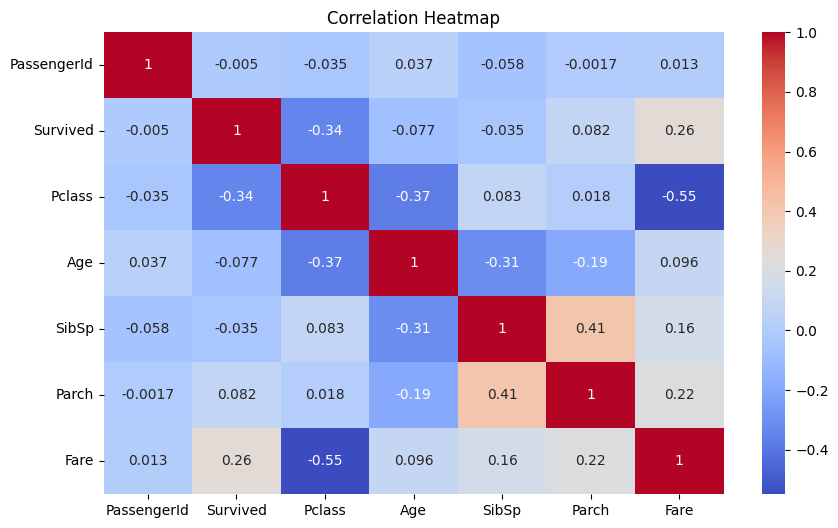

In [29]:
# f. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


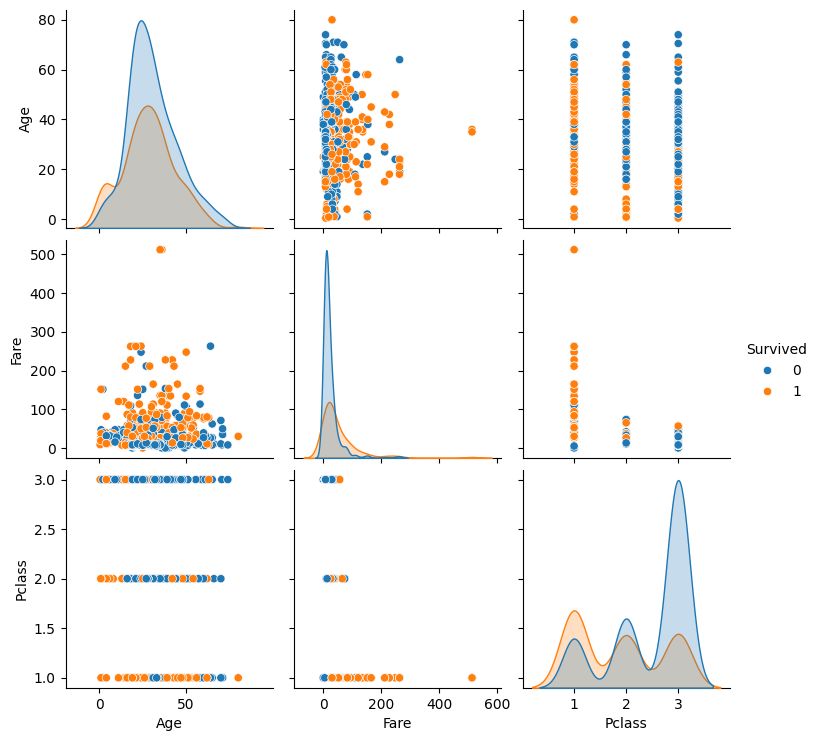

In [30]:
# g. Pairplot
sns.pairplot(df.dropna(subset=['Age']), hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()

In [31]:
# 7. Missing Value Handling (if needed later)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-31-2840446860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-31-2840446860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'